# Defeito

# Metodologia par o defeito:

As construções são as mesmas, mas incluímos um "if" para modificar a primeira partícula.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#define os valores de  massa e da constante elástica:
massa = 1
k = 1
n = int(input())

#constroi as matrizes com defeito m2=5
a = []
for z in range(0,n):
    a.append(z)
#print(a)


matriz_massa =[]
matriz_k = []
matriz = []
for z in range (0,n):
    matriz_massa.append([])
    matriz_k.append([])
    matriz.append([])
    for y in range(0,n):
        matriz_k[z].append(k)
        matriz[z].append(0)

        #aplica o defeito na matriz_massa
        if z == 1:
            matriz_massa[z].append(50)
        else:
            matriz_massa[z].append(massa)

In [28]:
#calcula os autovalores para um n definido na celula anterior em um 
# sistema homogeneo em que o a ultima massa está ligada a primeira.

a = []
for z in range(0,n):
    a.append(z)
#print(a)


for i in range(0,len(a)):
    for j in range (0,len(a)):

        if i==(j%len(a)):
            matriz[i][j] = ((matriz_k[i][(j-1)%len(a)] + matriz_k[i][(j+1)%len(a)]) / matriz_massa[i][j])
        
        if i==((j-1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])
        
        if i==((j+1)%len(a)):
            matriz[i][j] = -1*(matriz_k[i][j]) / (matriz_massa[i][j])

# Imprime a matriz resultante
print()
for p in matriz:
    print(p)


[2.0, -1.0, 0, 0, 0, 0, 0, 0, 0, -1.0]
[-0.02, 0.04, -0.02, 0, 0, 0, 0, 0, 0, 0]
[0, -1.0, 2.0, -1.0, 0, 0, 0, 0, 0, 0]
[0, 0, -1.0, 2.0, -1.0, 0, 0, 0, 0, 0]
[0, 0, 0, -1.0, 2.0, -1.0, 0, 0, 0, 0]
[0, 0, 0, 0, -1.0, 2.0, -1.0, 0, 0, 0]
[0, 0, 0, 0, 0, -1.0, 2.0, -1.0, 0, 0]
[0, 0, 0, 0, 0, 0, -1.0, 2.0, -1.0, 0]
[0, 0, 0, 0, 0, 0, 0, -1.0, 2.0, -1.0]
[-1.0, 0, 0, 0, 0, 0, 0, 0, -1.0, 2.0]


In [29]:
#Encontra os autovalores e autovetores da matriz
import matplotlib.pyplot as plt

# Calcula os autovalores da matriz usando a biblioteca NumPy eig:
autovalores, autovetores  = np.linalg.eig(matriz)

#Na biblioteca eig, os autovetores são retornados na coluna, então precisamos transpor a matriz de autovetores para obter os autovetores como linhas.
autovetores.T

print("autovalores:", autovalores)
print("autovetores:","\n", autovetores)

#Ordena os autovalores e autovetores
idx = autovalores.argsort()
print('\n',idx)
print(autovetores[:,idx])
autovetores = np.round(autovetores, decimals=5)

autovalores: [3.90251134e+00 3.61803399e+00 3.17892425e+00 2.61803399e+00
 2.00812901e+00 1.38196601e+00 8.37295052e-01 3.81966011e-01
 4.15233743e-17 1.13140349e-01]
autovetores: 
 [[ 1.39155298e-01 -2.62865556e-01 -3.63696830e-01 -4.25325404e-01
  -4.47150799e-01 -4.25325404e-01  3.54290131e-01 -2.62865556e-01
  -3.16227766e-01  1.00555624e-01]
 [-1.44108623e-03 -5.45853460e-17  4.63466845e-03  4.16576767e-18
   9.08783514e-03 -3.30240159e-17 -1.77746058e-02 -8.14724423e-17
  -3.16227766e-01 -5.49932427e-02]
 [ 1.39155298e-01  2.62865556e-01 -3.63696830e-01  4.25325404e-01
  -4.47150799e-01  4.25325404e-01  3.54290131e-01  2.62865556e-01
  -3.16227766e-01  1.00555624e-01]
 [-2.63303446e-01 -4.25325404e-01  4.24136343e-01 -2.62865556e-01
  -5.45294131e-03  2.62865556e-01  4.29709494e-01  4.25325404e-01
  -3.16227766e-01  2.44727593e-01]
 [ 3.61782494e-01  4.25325404e-01 -1.36327789e-01 -2.62865556e-01
   4.47195126e-01 -2.62865556e-01  1.45335224e-01  4.25325404e-01
  -3.16227766e-01 

# Resultados

# HISTOGRAMA

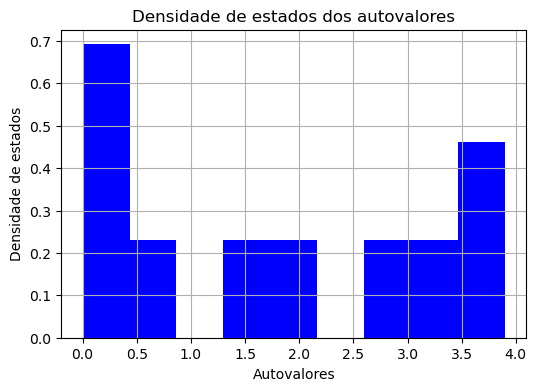

In [30]:
# Plota a densidade de estados (histograma dos autovalores)
plt.figure(figsize=(6,4))
plt.hist(autovalores, bins=9, density=True, color='blue')
plt.xlabel('Autovalores')
plt.ylabel('Densidade de estados')
plt.title('Densidade de estados dos autovalores')
plt.grid(True)
plt.show()

# 5 PRIMEIROS AUTOVALORES

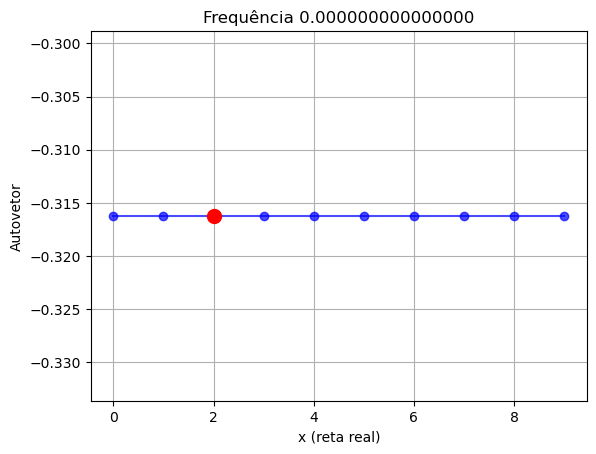

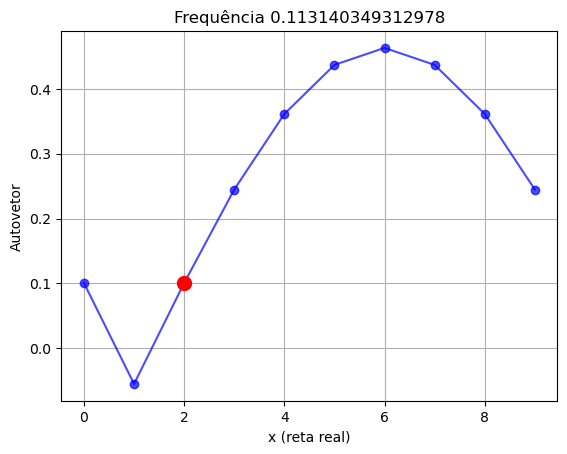

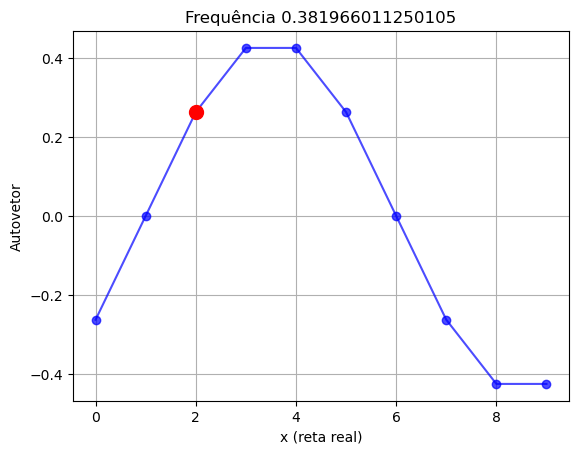

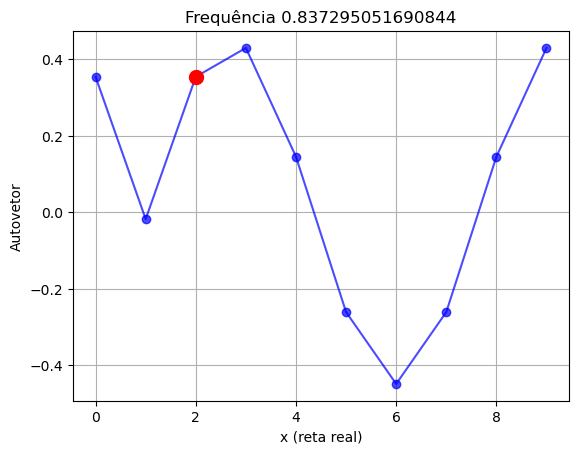

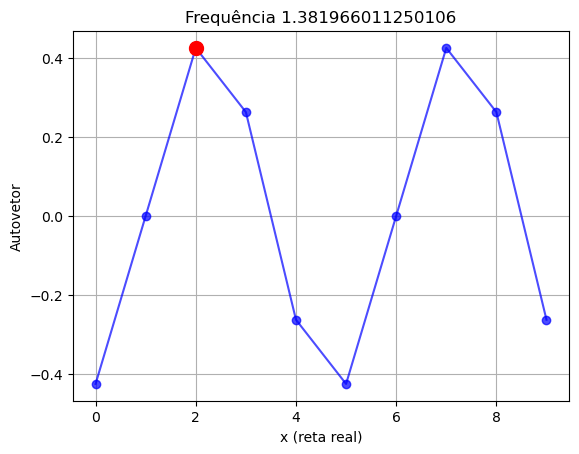

In [31]:
# Plota o primeiro autovetor em função de uma reta real x
x = np.arange(n)
#plt.figure(figsize=(20,8))

for i in range(5):
    plt.plot(x, autovetores[:,idx[i]], marker='o', alpha=0.7, linestyle='-', color='blue')
    # Destaca a segunda massa (x=2) em vermelho, se existir
    if n > 2:
        plt.plot(2, autovetores[2,idx[i]], marker='o', color='red', markersize=10)
    plt.xlabel('x (reta real)')
    plt.ylabel('Autovetor')
    plt.title(f'Frequência {autovalores[idx[i]]:.15f}')
    plt.grid(True)
    plt.show()

# 5 ÚLTIMOS AUTOVALORES

-0.31623


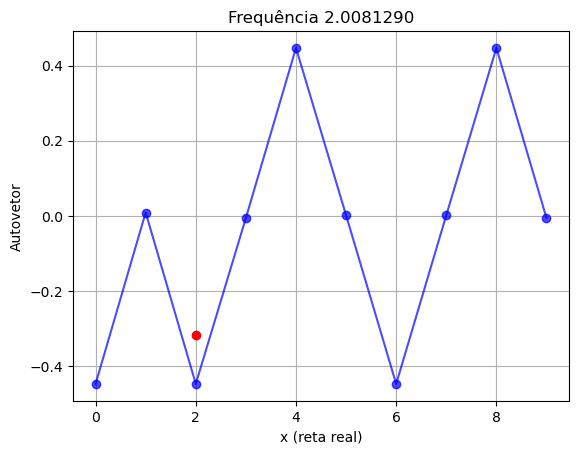

0.10056


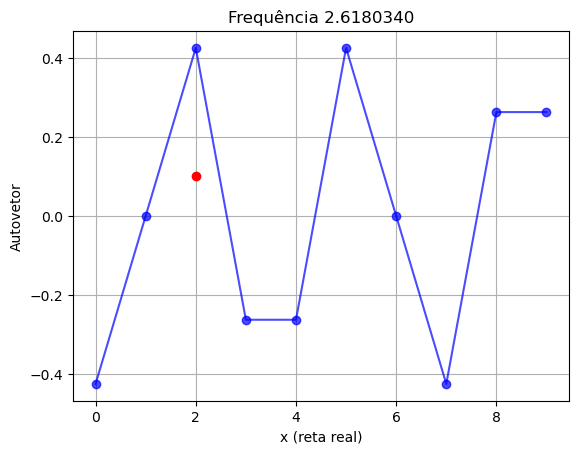

0.26287


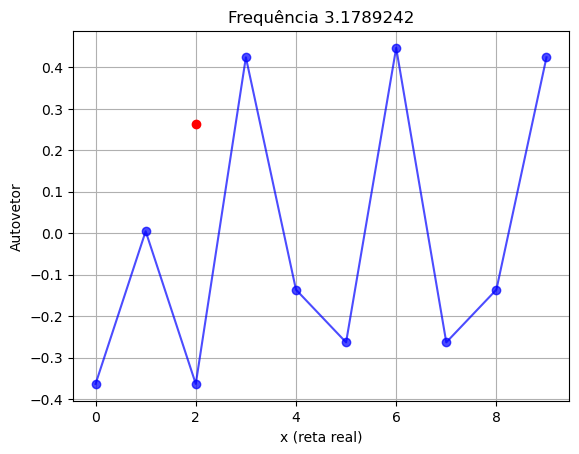

0.35429


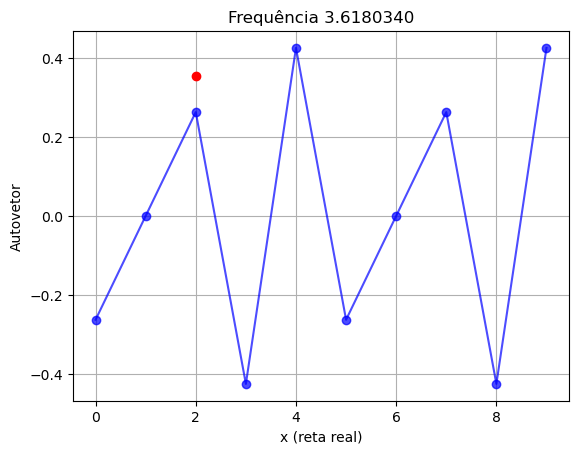

0.42533


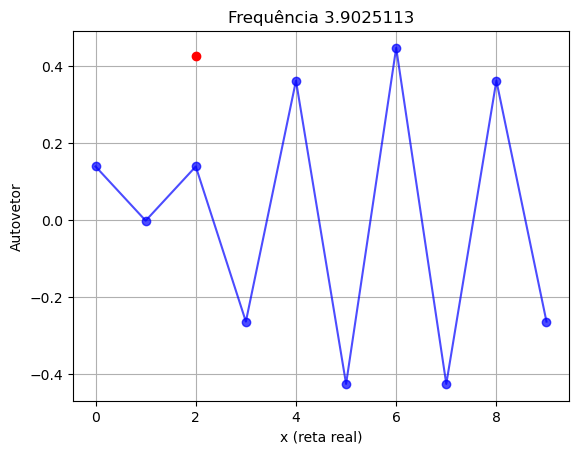

In [33]:
# Plota o primeiro autovetor em função de uma reta real x
x = np.arange(n)
#print(autovetores[2,idx[i]])

for i in range(5):
    plt.plot(x, autovetores[:,idx[n+i-5]], marker='o', alpha=0.7, linestyle='-', color='blue')
        # Destaca a segunda massa (x=2) em vermelho, se existir
    if n >= 2:
        plt.plot(2, autovetores[2,idx[i]], marker='o', color='red')
        print(autovetores[2,idx[i]])
    plt.xlabel('x (reta real)')
    plt.ylabel('Autovetor')
    plt.title(f'Frequência {autovalores[idx[n+i-5]]:.7f}')
    plt.grid(True)
    plt.show()